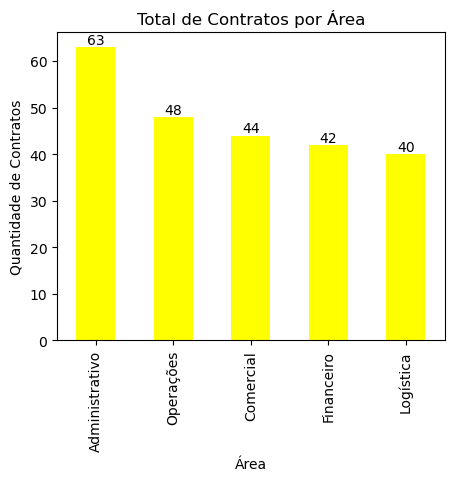

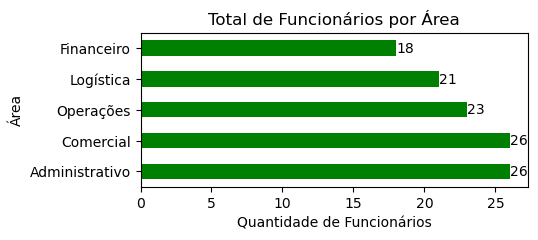

- Faturamento foi de R$5,519,160
- Total de folha salarial é de R$2,717,493.22
- Percentual foi de 86.84%
- O ticket médio mensal é de R$2,502.56


In [1]:
import pandas  as pd
import matplotlib.pyplot as plt

funcionarios = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal =',' )
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

funcionarios = funcionarios.drop(['Estado Civil', 'Cargo'], axis=1) # removendo as colunas que não vou usar

# #bloco para verificar a folha salárial. Salário total é uma coluna nova na tabela funcionário
salario_total = funcionarios['Salario Base'] + funcionarios['Impostos'] + funcionarios['Beneficios'] + funcionarios['VT'] + funcionarios['VR']
funcionarios['Salário Total'] = salario_total

#bloco para verificar o Faturamento da Empresa
faturamento_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']])

#bloco para verificar o Percentual de Funcionários que fechou contrato
qtde_funcionarios_fecharam = len(servicos_df['ID Funcionário'].unique())
qtde_funcionarios_totais = len(funcionarios['ID Funcionário'])

#bloco para verificar o total de contratos por área e gráfico
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios[['ID Funcionário', 'Area']])
qtde_contratos_area = contratos_area_df['Area'].value_counts()
plt.figure(figsize=(5, 4))
qtde_contratos_area.plot(kind='bar', color= "yellow")
plt.title('Total de Contratos por Área')
plt.xlabel('Área')
plt.ylabel('Quantidade de Contratos')
tot_contratos = plt.gca()
for i in tot_contratos.containers:
    tot_contratos.bar_label(i)
plt.show()

#loco para verificar o Total de Funcionários por Área e gráfico
qtde_funcionarios_area = funcionarios['Area'].value_counts()
plt.figure(figsize=(5, 2))
qtde_funcionarios_area.plot(kind='barh', color= 'green')
plt.title('Total de Funcionários por Área')
plt.xlabel('Quantidade de Funcionários')
plt.ylabel('Área')
tot_func = plt.gca()
for i in tot_func.containers:
    tot_func.bar_label(i)
plt.show()

#bloco para verificar o Ticket Médio Mensal
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()

# exibir valores
print('- Faturamento foi de R${:,}'.format(sum(faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal'])))
print('- Total de folha salarial é de R${:,}'.format(sum(funcionarios['Salário Total'])))
print('- Percentual foi de {:.2%}'.format(qtde_funcionarios_fecharam / qtde_funcionarios_totais))
print('- O ticket médio mensal é de R${:,.2f}'.format(ticket_medio))

